In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets\train'
valid_path = 'Datasets\test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('./../Datasets/train/*')

In [12]:
folders

['./../Datasets/train\\Black Scurf',
 './../Datasets/train\\Blackleg',
 './../Datasets/train\\Common Scab',
 './../Datasets/train\\Dry Rot',
 './../Datasets/train\\Healthy Potatoes',
 './../Datasets/train\\Miscellaneous',
 './../Datasets/train\\Pink Rot']

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./../Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 451 images belonging to 7 classes.


In [19]:
test_set = test_datagen.flow_from_directory('./../Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 210 images belonging to 7 classes.


In [20]:
import scipy
from scipy import interpolate
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
15/15 [==============================] - 45s 3s/step - loss: 9.2911 - accuracy: 0.1641 - val_loss: 5.4386 - val_accuracy: 0.1190
Epoch 2/50
15/15 [==============================] - 37s 2s/step - loss: 4.1665 - accuracy: 0.1818 - val_loss: 1.9865 - val_accuracy: 0.3429
Epoch 3/50
15/15 [==============================] - 37s 2s/step - loss: 2.4626 - accuracy: 0.2572 - val_loss: 2.4667 - val_accuracy: 0.3619
Epoch 4/50
15/15 [==============================] - 36s 2s/step - loss: 2.5518 - accuracy: 0.2528 - val_loss: 2.2684 - val_accuracy: 0.2857
Epoch 5/50
15/15 [==============================] - 36s 2s/step - loss: 2.3308 - accuracy: 0.2794 - val_loss: 2.0237 - val_accuracy: 0.4095
Epoch 6/50
15/15 [==============================] - 36s 2s/step - loss: 2.0902 - accuracy: 0.3038 - val_loss: 1.5943 - val_accuracy: 0.3952
Epoch 7/50
15/15 [==============================] - 36s 2s/step - loss: 2.4820 - accuracy: 0.3060 - val_loss: 1.9700 - val_accuracy: 0.2524
Epoch 8/50
15/15 [==

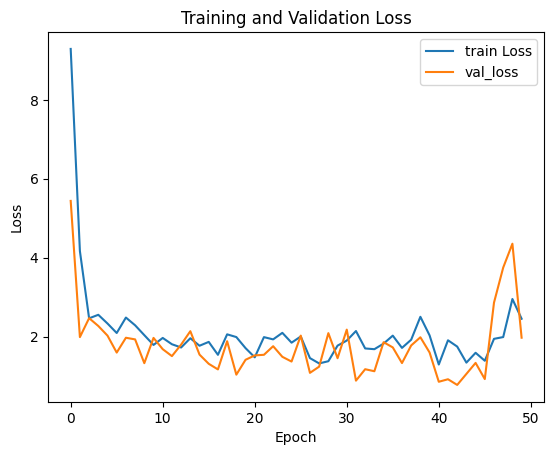

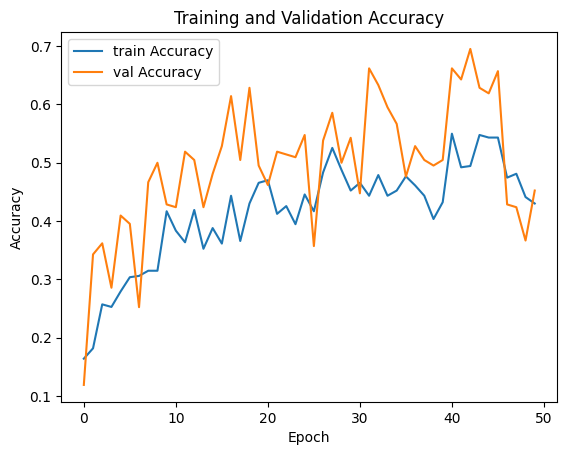

In [62]:
## plot the loss


plt.plot(r.history['loss'], label='train Loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model1.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(r.history['accuracy'], label='train Accuracy')
plt.plot(r.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model1.png')
plt.show()

In [22]:
y_pred=model.predict(test_set)

7/7 [==============================] - 32s 3s/step


In [23]:
y_pred

array([[2.34717838e-02, 8.09487301e-06, 1.48145407e-02, ...,
        1.21024894e-02, 1.65466949e-01, 7.81932950e-01],
       [8.70527446e-01, 1.47543039e-06, 3.73572260e-02, ...,
        7.00731971e-06, 1.50037855e-02, 7.23453537e-02],
       [6.89398825e-01, 7.17084185e-05, 1.78054005e-01, ...,
        8.51617806e-05, 4.25652228e-02, 3.07156462e-02],
       ...,
       [1.69904367e-03, 1.08715039e-05, 6.87245396e-04, ...,
        1.57068030e-06, 1.54073492e-01, 8.43191445e-01],
       [1.74305275e-01, 4.99657581e-05, 1.43932268e-01, ...,
        4.62860362e-06, 1.23441204e-01, 4.82045829e-01],
       [7.59057887e-03, 3.14634672e-05, 4.93319720e-01, ...,
        6.77031407e-04, 2.99044073e-01, 1.94826409e-01]], dtype=float32)

In [24]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [25]:
y_pred

array([6, 0, 0, 2, 0, 6, 6, 4, 4, 6, 6, 6, 0, 2, 2, 6, 6, 6, 0, 6, 6, 6,
       6, 6, 6, 6, 4, 6, 6, 4, 4, 6, 0, 6, 5, 6, 4, 4, 0, 6, 6, 6, 6, 4,
       6, 6, 2, 6, 6, 6, 4, 3, 6, 6, 4, 6, 6, 6, 4, 6, 2, 6, 6, 6, 6, 6,
       4, 6, 6, 6, 6, 4, 4, 6, 6, 3, 3, 2, 0, 6, 6, 5, 2, 6, 6, 4, 4, 0,
       5, 6, 0, 6, 3, 0, 6, 6, 6, 2, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6,
       4, 6, 2, 6, 6, 3, 6, 6, 2, 0, 6, 5, 4, 6, 0, 4, 6, 6, 6, 3, 6, 1,
       6, 4, 4, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 2, 2, 6, 6, 0, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 2, 0, 4, 6,
       0, 6, 1, 6, 0, 4, 2, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 0, 2, 2, 2, 6,
       0, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2], dtype=int64)

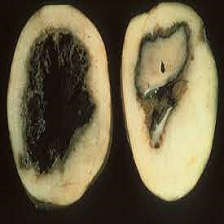

In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

img=image.load_img('./../Datasets/test/Blackleg/22.jpg' ,target_size=(224,224))

img

In [57]:
x=image.img_to_array(img)
x

array([[[23., 14.,  9.],
        [23., 14.,  9.],
        [23., 14.,  9.],
        ...,
        [25., 16., 11.],
        [25., 16., 11.],
        [25., 16., 11.]],

       [[23., 14.,  9.],
        [23., 14.,  9.],
        [23., 14.,  9.],
        ...,
        [25., 16., 11.],
        [25., 16., 11.],
        [25., 16., 11.]],

       [[23., 14.,  9.],
        [23., 14.,  9.],
        [23., 14.,  9.],
        ...,
        [25., 16., 11.],
        [25., 16., 11.],
        [25., 16., 11.]],

       ...,

       [[24., 15., 10.],
        [24., 15., 10.],
        [24., 15., 10.],
        ...,
        [27., 20., 14.],
        [27., 20., 14.],
        [27., 20., 14.]],

       [[24., 15., 10.],
        [24., 15., 10.],
        [24., 15., 10.],
        ...,
        [27., 20., 14.],
        [27., 20., 14.],
        [27., 20., 14.]],

       [[24., 15., 10.],
        [24., 15., 10.],
        [24., 15., 10.],
        ...,
        [27., 20., 14.],
        [27., 20., 14.],
        [27., 20., 14.]]

In [58]:
x=x/255 #resize the data

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

1/1 [==============================] - 0s 367ms/step


array([[2.9083549e-10, 9.9630666e-01, 2.0093063e-09, 9.9281738e-10,
        2.6591799e-19, 1.9070964e-12, 3.6933161e-03]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data),axis=1)
print(a)

1/1 [==============================] - 0s 278ms/step
[1]
